# <font color='blue'><u>Estudo de Caso</u></font>

## <font color='blue'>Análise Exploratória e Data Wrangling Para E-Commerce Analytics</font>

#### Obs: Estaremos utilizando a mesma base de dados para trabalhar em um grande projeto de Ciência de Dados distribuído em 3 capítulos:

- Capítulo 4 (Análise Exploratória de Dados) -> <strong>Atual</strong>
    - **Parte 1**
    - **Parte 2**
- Capítulo 5 (Engenharia de Atributos)
- Capítulo 6 (Pré-Processamento de Dados)

## Contexto (Cap. 4)

#### Este Estudo de Caso traz uma série de atividades em uma das tarefas mais importantes em Ciência de Dados, a Análise Exploratória.

#### Na Parte 1 do Estudo de Caso,a Análise Exploratória traz os detalhes técnicos com análise estatística, visualização  de  dados,  interpretação  de  gráficos  e  tabelas,  análise  univariada  e bivariada e relatório de conclusão.

#### Na Parte 2 o foco é na Análise Exploratória para responder perguntas de negócio, onde os dados são manipulados através de Data Wrangling com Pandas e analisados por diferentes perspectivas. Customização de gráficos é outro tema abordado durante as aulas.

#### Todo  o  Estudo  de  Caso é  no  contexto  de  um  problema  de  negócio  em  E-Commerce Analytics.<br><br><br>

## Definição do Problema<br>

Uma empresa internacional de comércio eletrônico (E-commerce)que vende produtos eletrônicos deseja descobrir informações importantes de seu banco de dados de clientes.

Os produtos ficam armazenados em um armazém na sede da empresa. Após concluir a compra no web site da empresa, o cliente recebe o produto em casa, em qualquer parte do mundo.  Os  produtos  são  enviados  de  Navio,  Avião  ou  Caminhão,  dependendo  da  região  de entrega.

Em cada compra o cliente pode receber um desconto dependendo do peso do produto comprado. Cada cliente pode fazer chamadas ao suporte da empresa no caso de dúvidas ou problemas e após receber o produto o cliente pode deixar uma avaliação sobre a experiência de compra. O único dado pessoal sobre o cliente que está disponível é o gênero.

Nosso trabalho neste <u>Estudo de Caso</u> é explorar os dados, compreender como estão organizados, detectar eventuais problemas e analisar os dados por diferentes perspectivas.

Trabalharemos com dados fictícios que representam dados reais de uma empresa de E-Commerce. Os dados estão disponíveis na pasta "dados". <br><br><br>

## Dicionário de Dados<br><br>

<table border="2">
  <tr>
    <th>Nome da Coluna</th>
    <th>Tipo de Dado</th>
    <th>Descrição</th>
  </tr>
  <tr>
    <td>ID</td>
    <td>Int</td>
    <td>ID exclusivo de cada transação.</td>
  </tr>
  <tr>
    <td>corredor_armazem</td>
    <td>Character(1)</td>
    <td>Letra do corredor do armazém onde o produto está armazenado.</td>
  </tr>
  <tr>
    <td>modo_envio</td>
    <td>String</td>
    <td>Modo de envio do produto.</td>
  </tr>
  <tr>
    <td>numero_chamadas_cliente</td>
    <td>Int</td>
    <td>Número de vezes que o cliente acionou o suporte da empresa.</td>
  </tr>
  <tr>
    <td>avaliacao_cliente</td>
    <td>Int</td>
    <td>Avaliação do cliente sobre a experiência de compra.</td>
  </tr>
  <tr>
    <td>custo_produto</td>
    <td>Int</td>
    <td>Custo do produto.</td>
  </tr>
  <tr>
    <td>compras_anteriores</td>
    <td>Int</td>
    <td>Número de vezes que o cliente fez uma compra na empresa.</td>
  </tr>
  <tr>
    <td>prioridade_produto</td>
    <td>String</td>
    <td>Prioridade de entrega do produto.</td>
  </tr>
  <tr>
    <td>genero</td>
    <td>Character(1)</td>
    <td>Gênero do cliente (F ou M).</td>
  </tr>
  <tr>
    <td>desconto</td>
    <td>Int</td>
    <td>Desconto concedido na compra do produto.</td>
  </tr>
  <tr>
    <td>peso_gramas</td>
    <td>Int</td>
    <td>Peso do produto.</td>
  </tr>
  <tr>
    <td>entregue_no_prazo</td>
    <td>Character(1)</td>
    <td>Se o produto foi entregue no prazo, sendo 0 (não foi entregue no prazo) ou 1 (foi entregue no prazo).</td>
  </tr>
</table><br><br><br><br>

In [1]:
# Importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

pandas    : 2.2.1
matplotlib: 3.8.3
numpy     : 1.26.4
seaborn   : 0.13.2



In [27]:
# Parâmetros de configuração dos gráficos globais
# (estratégia pra não ficar configurando parâmetro gráfico a gráfico. Desta forma os parâmetros serão padronizados)
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

<br><br>

# Carregando o Dataset<br>

In [4]:
# Carrega os dados
df = pd.read_csv('dados/dataset.csv')

In [5]:
# Visualizando dataframe
df

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0


In [6]:
# Shape
df.shape

(11000, 12)

In [7]:
# Verificando sumário
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Verificando 5 linhas aleatórias
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
4107,4108,B,Aviao,3,5,108,2,baixa,F,10,5559,1
453,454,B,Navio,4,1,275,10,media,F,23,2726,1
9541,9542,F,Navio,3,4,171,3,baixa,M,10,4839,0
8428,8429,C,Navio,4,1,236,3,baixa,F,8,4114,0
3948,3949,D,Caminhao,4,1,258,3,media,M,2,4188,0


<br><br>

# <u>Parte 1</u><br>

### Verificação e tratamento dos tipos das Variáveis (Categóricas e Numéricas)

In [9]:
# Verificando nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [10]:
# Verificando o tipo das variáveis (objetc = categórica | int = numérica)
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [11]:
# Criando uma lista com o nome das variáveis que foram definidas pelo PANDA como categóricas para filtragem
cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [12]:
# Criando uma lista com o nome das variáveis que foram definidas pelo PANDA como numéricas para filtragem
nums = ['numero_chamadas_cliente', 
        'avaliacao_cliente', 
        'custo_produto', 
        'compras_anteriores', 
        'desconto', 
        'peso_gramas']

# -> A variávei "ID" não foi incluída pois não é uma variável com informações válidas
# -> A variável alvo/target 'entregue_no_prazo' (variável cujo objetivo é ser prevista) também foi removida
#    das variáveis numéricas

In [13]:
# Verificando sumário da variável alvo
df['entregue_no_prazo'].value_counts()

entregue_no_prazo
1    6563
0    4437
Name: count, dtype: int64

In [14]:
# Criando uma lista com a variável alvo
target = ['entregue_no_prazo']
target

['entregue_no_prazo']

In [15]:
type(target)

list

### <br>Explorando as Variávels Numéricas

In [16]:
# Resumo das variáveis numéricas
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Algumas observações:

1. As colunas `numero_chamadas_cliente`, `avaliacao_cliente` e `custo_produto` parecem ter uma distribuição bastante simétrica (média e mediana não são tão diferentes).

2. As colunas `compras_anteriores` e `desconto` parecem estar inclinadas para a direita (Média maior do que a Mediana).

3. A coluna `peso_gramas` parece estar mais inclinada para a esquerda (Média menor do que a Mediana).

#### Gráficos Histograma

<Axes: >

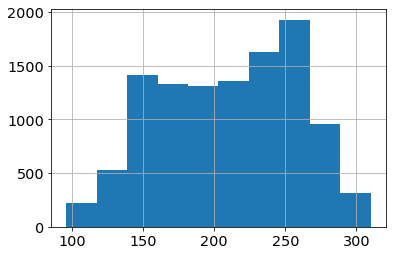

In [17]:
# Variável custo_produto
df['custo_produto'].hist()

<Axes: >

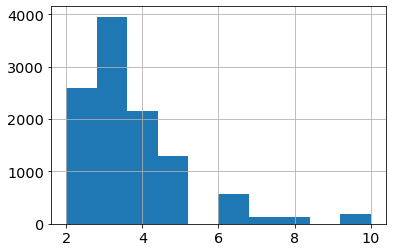

In [18]:
# Variável custo_produto
df['compras_anteriores'].hist()

### <br>Explorando as Variávels Categóricas

In [19]:
# Resumo das variáveis categóricas (describe exibe informações para variáveis categóricas somente com filtro)
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


Algumas observações:

* Top informa a classe com mais resultados e freq informa a quantidade de resultados

* Para a variável corredor_armazem **F** é a classe dominante.
* Para a variável de modo de envio **Navio** é a classe dominante.
* Para a variável de prioridade do produto **baixa** é a classe dominante.
* Para a variável de gênero, **F(Feminino)** é a classe dominante.
* Todos os valores únicos para cada categoria estão em torno de **2-5 valores únicos**

In [20]:
# Criando loop para listar o value_counts() por categoria de cada variável categórica
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df[col].value_counts())
    print()

Total de Registros Por Categoria da Variável corredor_armazem:
corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: count, dtype: int64

Total de Registros Por Categoria da Variável modo_envio:
modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

Total de Registros Por Categoria da Variável prioridade_produto:
prioridade_produto
baixa    5298
media    4754
alta      948
Name: count, dtype: int64

Total de Registros Por Categoria da Variável genero:
genero
F    5546
M    5454
Name: count, dtype: int64



### <br>Criando Gráficos para Análise das Variávels Numéricas (Univariada = Analise 1 variável)

#### Análise Univariada - Box Plots

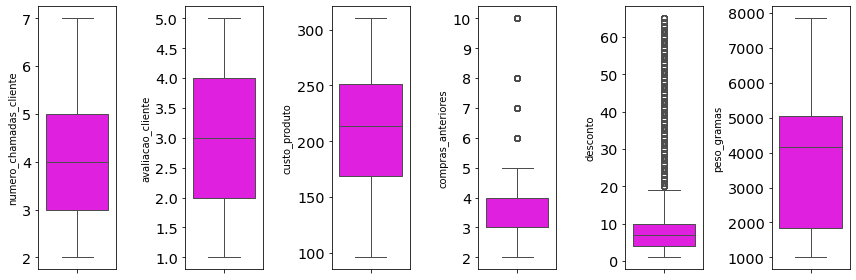

In [28]:
# Gerando Box Plots para todas as variáveis numéricas
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'magenta', orient = 'v')
    plt.tight_layout()

#### Análise Univariada - Dist Plots

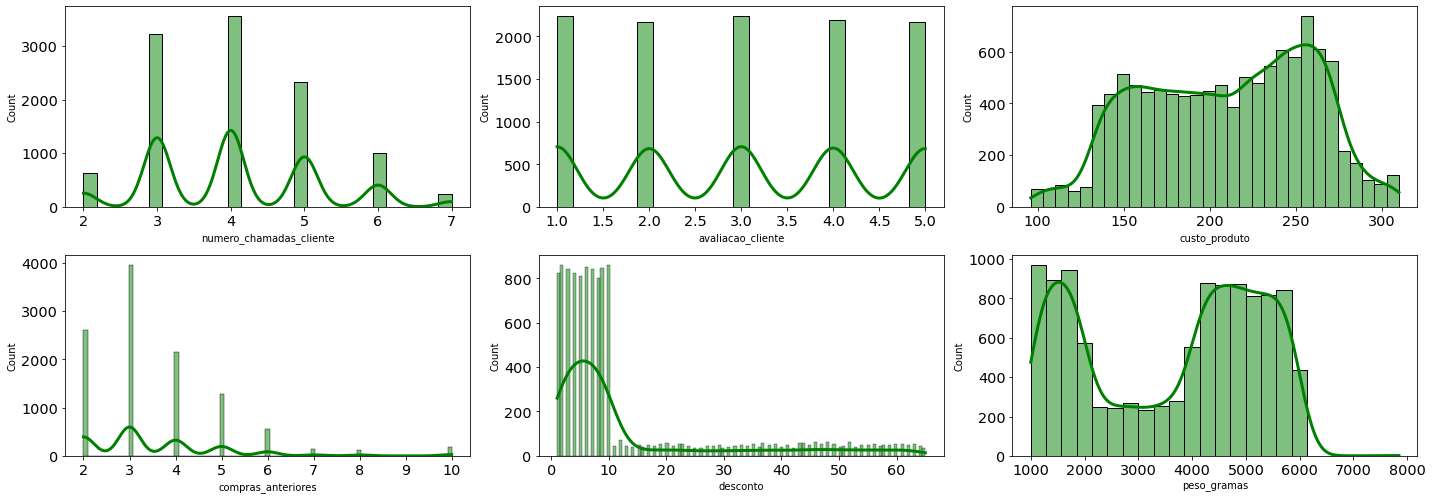

In [29]:
# Gerando Dist Plots para todas as variáveis numéricas 
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)//2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'green')
    plt.xlabel(features[i])
    plt.tight_layout()

#### Análise Univariada - Violin Plots

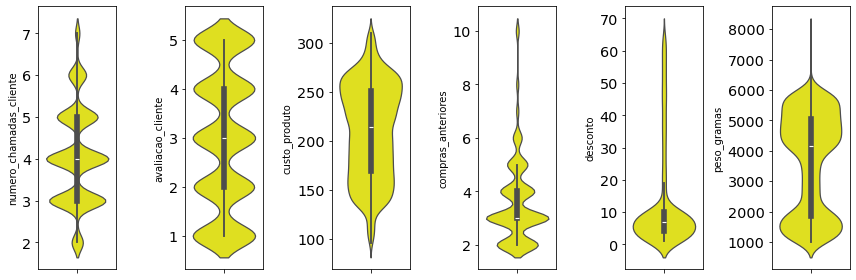

In [30]:
# Gerando Violin Plots para todas as variáveis numéricas 
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

#### Interpretando os Gráficos

A partir dos gráficos pode-se observar que:

* A coluna `custo_produto` parece estar próxima de uma distribuição normal.

* Como suspeitamo, as colunas `compras_anteriores` e `desconto` estão ligeiramente *inclinadas*, o que significa que existe a possibilidade de precisarmos fazer algo com essas colunas mais tarde.

* Para a coluna `peso_gramas` há incerteza de distribuição porque é em forma de u.

* As colunas `numero_chamadas_cliente` e `avaliacao_cliente` estão distribuídas uniformemente.

### Criando Gráficos para Análise das Variávels Categóricas

#### Análise Univariada - Count Plot (Categorical)

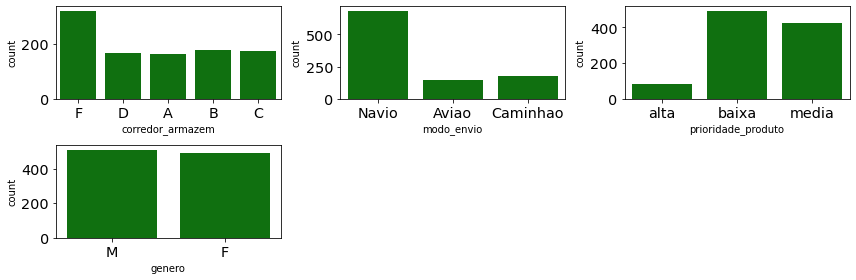

In [36]:
# Gerando Count Plots para todas as variáveis categóricas 
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'green', orient = 'v')
    plt.tight_layout()

#### Interpretando os Gráficos

A partir dos gráficos pode-se observar que:

* A maioria dos produtos enviados vieram do corredor F.

* Modo de envio através de Navio é o mais comum.

* Há poucos produtos com prioridade alta de entrega.

* A proporção de clientes do sexo Masculino e Feminino é praticamente a mesma.

### <br>Criando Gráfico para Análise da Variável Alvo

#### Análise Univariada - Count Plot (Variável Alvo)

<Axes: xlabel='entregue_no_prazo', ylabel='count'>

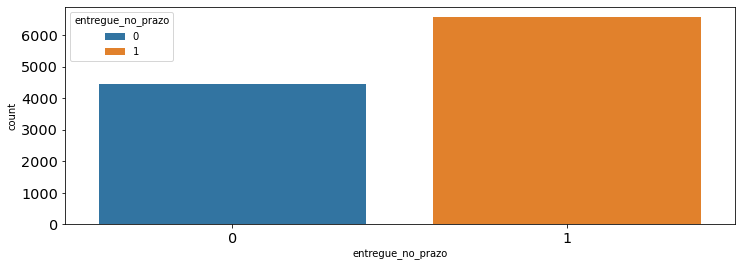

In [37]:
# Count Plot da variável target
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

#### Interpretando o Gráfico

A partir do gráfico pode-se observar que:

* A coluna `entregue_no_prazo` é binária, então não há necessidade de prestar muita atenção à forma da distribuição.


# <br> Relacionamento entre as Variáveis x Variável Alvo (Análise Bivariada)

### <br>Mapa de Correlação para Análise das Variávels Numéricas x Variável Target

In [33]:
# Criando Mapa de Correlação (somente variáveis numéricas)
corr_df = df[nums].corr()
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<Axes: >

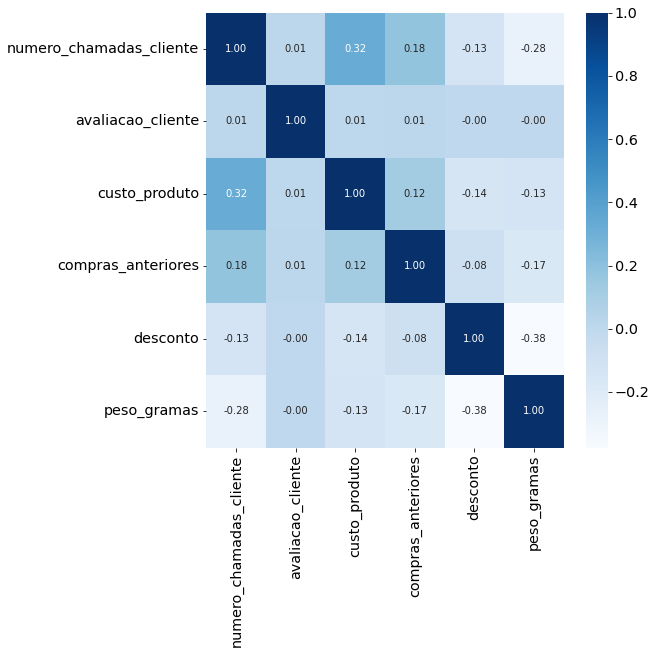

In [35]:
# Visualizando Mapa de Correlação através de Gráfico
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

A partir do *mapa de correlação* acima, pode-se ver que:

* Há uma correlação positiva entre `numero_chamadas_cliente` e `custo_produto`.
* Há uma correlação positiva entre `numero_chamadas_cliente` e `compras_anteriores`.
* Há uma correlação negativa entre `desconto` e `peso_gramas`.
* E há uma correlação fraca entre as demais variáveis.

Obs: Não usamos correlação para variáveis categóricas. Nesse caso usamos associação.

### <br>Criando Gráficos para Análise das Variávels Categóricas x Variável Target

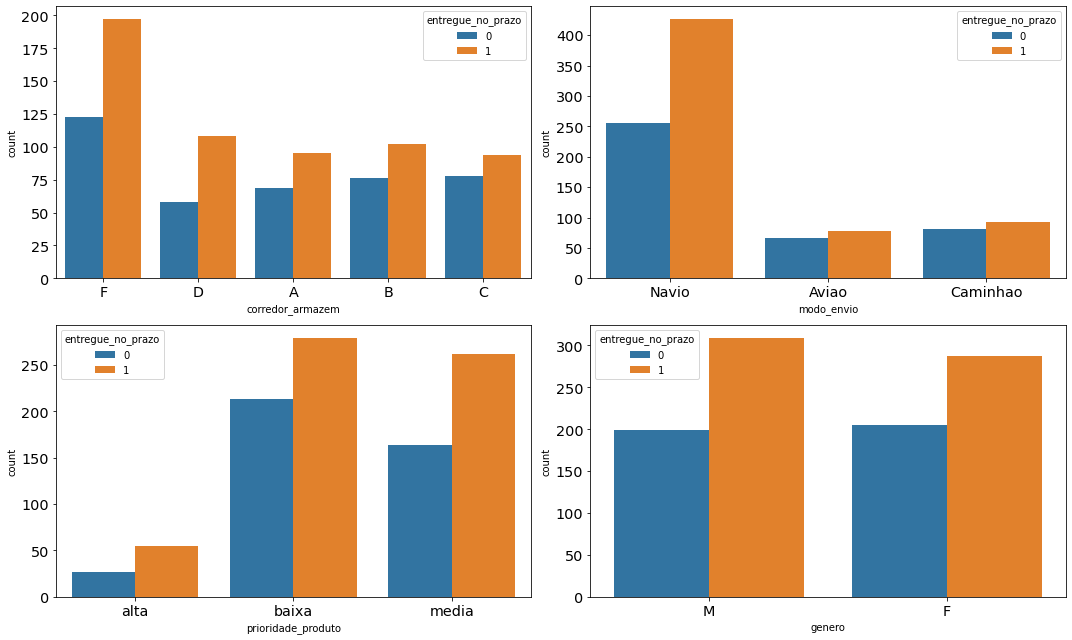

In [39]:
# Gerando Count Plots para todas as variáveis categóricas x variável alvo
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1) 
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo')
    plt.tight_layout()

Observações:

* Envio por navio tende a apresentar atraso na entrega.
* Em prioridade_produto as categorias baixa e média tendem a apresentar atrasos na entrega.
* Em corredor_armazem produtos do corredor F tendem a apresentar atraso na entrega.
* Produtos comprados por mulheres tem um volume ligeiramente menor de entregas feitas no prazo.

## <br>Conclusão da Parte 1 da EDA:

Algumas das coisas que encontramos neste conjunto de dados são:

* Os dados parecem válidos e não há defeitos maiores/significativos.

* Existem algumas distribuições que são um pouco *assimétricas*, isso deve ser lembrado se usarmos modelos que exijam a suposição de uma distribuição normal.

* Não detectamos problemas de multicolinearidade.

* Alguns *recursos* parecem completamente não correlacionados.

* Dos recursos categóricos, `modo_envio` , `corredor_armazem` e `importancia_produto` parecem úteis para prever a variável target.

# <br><br><u>Parte 2</u>
#### -> Esta parte 2 terá como foco perguntas de negócio. <br>

## <br><br><u><font color='darkgreen'>Pergunta 1:</font></u><br>

### 1) Os atrasos nas entregas estão igualmente distribuídos pelos modos de envio? Há diferenças discrepantes?


In [41]:
# Relembrando nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [42]:
# Verificando as classes da Coluna modo_envio
df['modo_envio'].value_counts()

modo_envio
Navio       7463
Aviao       1777
Caminhao    1760
Name: count, dtype: int64

* Podemos constatar que tem muito mais mercadorias sendo enviada por Navio. Por isso em números absolutos obviamente Navio terá o maior número.
* Mas e em números percentuais?

In [43]:
# Criando Tabela de Agregação 1 através de entregue_no_prazo e modo_envio
# Usando coluna ID para retornar a quantidade de valores únicos
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID' : 'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [44]:
# Criando Tabela de Agregação 2 através de entregue_no_prazo
# Usando coluna ID para retornar a quantidade de valores únicos
df_group2 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [45]:
# Criando Tabela de agregação 3 (
# Concatenando Tabela de Agregação 1 e Tabela de Agregação 2 com base na coluna "entregue_no_prazo"
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [46]:
# Criando Tabela de Agregação 4 através de modo_envio
# Usando coluna ID para retornar a quantidade de valores únicos
df_group4 = df.groupby('modo_envio').agg({'ID' : 'nunique'}).reset_index() 
df_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [47]:
# Criando Tabela de Agregação 5 (
# Concatenando Tabela de Agregação 1 e Tabela de Agregação 4 com base na coluna "modo_envio"
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,0,Caminhao,725,1760
2,0,Navio,3004,7463
3,1,Aviao,1069,1777
4,1,Caminhao,1035,1760
5,1,Navio,4459,7463


In [48]:
# Utilizando Tabela de Agregação 5 , vamos criar uma nova coluna para calcular o percentual
# (divivindo ID_x por ID_y e multiplica por 100)
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,0,Caminhao,725,1760,41.193182
2,0,Navio,3004,7463,40.251909
3,1,Aviao,1069,1777,60.157569
4,1,Caminhao,1035,1760,58.806818
5,1,Navio,4459,7463,59.748091


In [49]:
# Renomeando as Colunas da Tabela de Agregação 5
df_group5.columns = ['Status de Entrega no Prazo', 
                     'Modo de Envio', 
                     'Total Por Categoria', 
                     'Total Geral', 
                     'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total Por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,0,Caminhao,725,1760,41.193182
2,0,Navio,3004,7463,40.251909
3,1,Aviao,1069,1777,60.157569
4,1,Caminhao,1035,1760,58.806818
5,1,Navio,4459,7463,59.748091


### <br>Gráfico 1 - Análise em Valores Absolutos

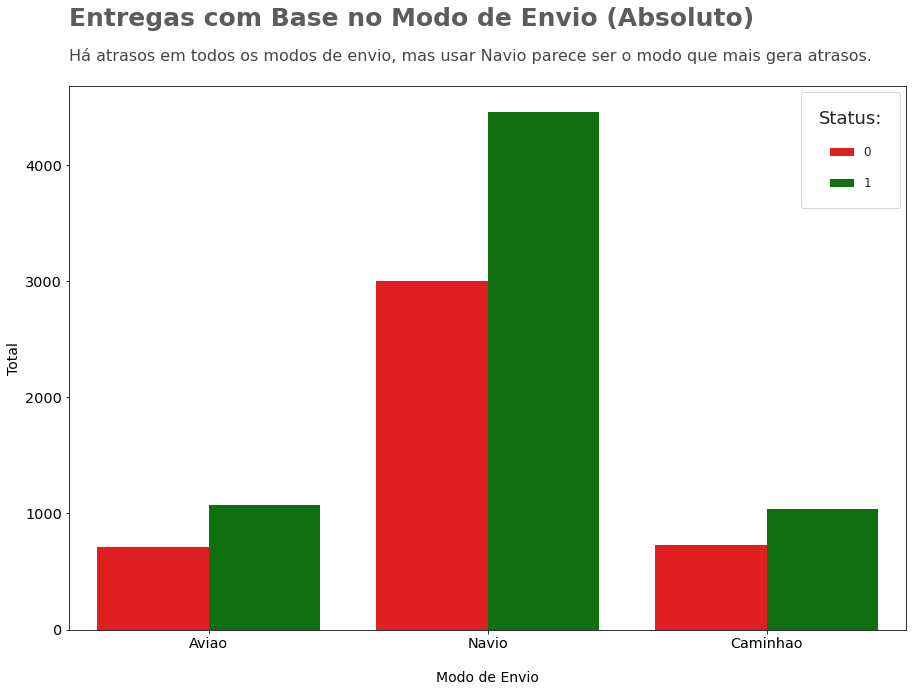

In [50]:
# Gráfico 1 - Análise em Valores Absolutos (utilizando o dataframe com dados completos df)

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.countplot(data = df, 
                      x = 'modo_envio', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legenda
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Adicionado Título 
chart.text(x = -0.5, 
           y = 5200, 
           s = "Entregas com Base no Modo de Envio (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Adicionado Sub-Título
chart.text(x = -0.5, 
           y = 4900,
           s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
           fontsize = 16, 
           alpha = .85);

### <br>Gráfico 2 - Análise em Valores Percentuais

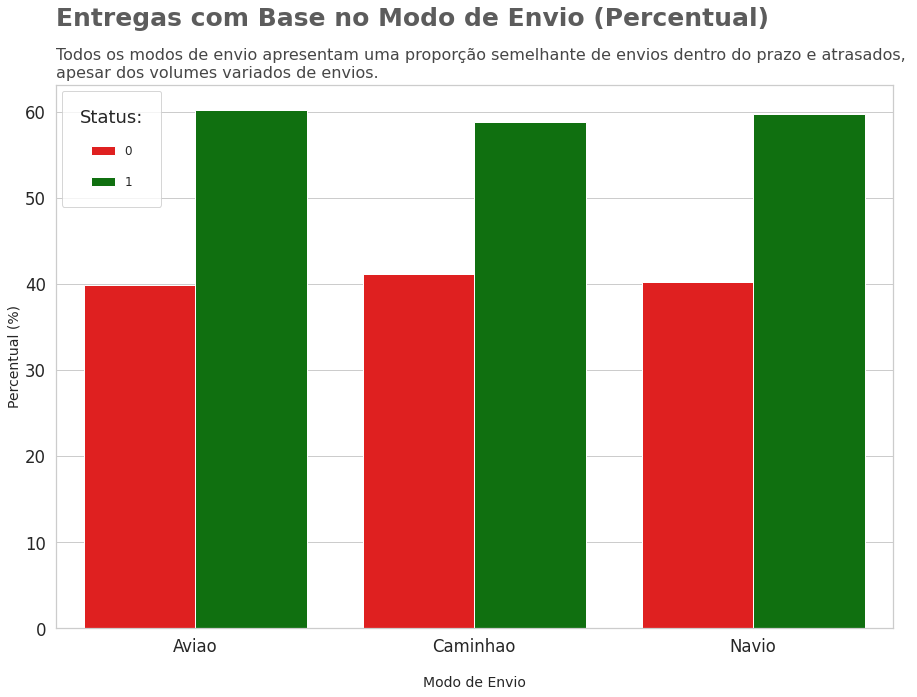

In [51]:
# Gráfico 2 - Análise em Valores Percentuais (utilizando o dataframe df_group5)

# Tamanho da figura
plt.figure(figsize = (15,10))

# Chart
chart = sns.barplot(x = 'Modo de Envio', 
                    y = 'Percentual(%)', 
                    data = df_group5, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])

# Estilo e labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legenda
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')

# Título
chart.text(x = -0.5, 
           y = 70, 
           s = "Entregas com Base no Modo de Envio (Percentual)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)

# Sub-título
chart.text(x = -0.5, 
           y = 64,
           s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasados, \napesar dos volumes variados de envios.',
           fontsize = 16, 
           alpha = .85);

### -> Resposta:   as respostas estão nos gráficos.

## <br><br><u><font color='darkgreen'>Pergunta 2:</font></u><br>

### 2) Há diferença significativa no atraso das entregas quando o produto tem prioridade baixa ou média?

In [53]:
# Relembrando nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [55]:
# Verificando as classes da Coluna prioridade_produto
df['prioridade_produto'].value_counts()

prioridade_produto
baixa    5298
media    4754
alta      948
Name: count, dtype: int64

In [57]:
# Criando Tabela de Agregação 6 através de entregue_no_prazo e prioridade_produto
# Usando coluna ID para retornar a quantidade de valores únicos
df_group6 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID' : 'nunique'}).reset_index()
df_group6

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [59]:
# Criando Tabela de Agregação 7 através de entregue_no_prazo
# Usando coluna ID para retornar a quantidade de valores únicos
df_group7 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group7

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [60]:
# Criando Tabela de agregação 8 (
# Concatenando Tabela de Agregação 6 e Tabela de Agregação 7 com base na coluna "entregue_no_prazo"
df_group8 = df_group6.merge(df_group7, on = 'entregue_no_prazo')
df_group8

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [61]:
# Criando Tabela de Agregação 9 através de prioridade_produto
# Usando coluna ID para retornar a quantidade de valores únicos
df_group9 = df.groupby('prioridade_produto').agg({'ID' : 'nunique'}).reset_index() 
df_group9

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [63]:
# Criando Tabela de Agregação 10 (
# Concatenando Tabela de Agregação 6 e Tabela de Agregação 9 com base na coluna "prioridade_produto"
df_group10 = df_group6.merge(df_group9, on = 'prioridade_produto')
df_group10

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,0,baixa,2158,5298
2,0,media,1947,4754
3,1,alta,616,948
4,1,baixa,3140,5298
5,1,media,2807,4754


In [66]:
# Utilizando Tabela de Agregação 10 , vamos criar uma nova coluna para calcular o percentual
# (divivindo ID_x por ID_y e multiplica por 100)
df_group10['Percentual(%)'] = df_group10['ID_x'] / df_group10['ID_y'] * 100

# Renomeando Colunas
df_group10.columns = ['Status de Entrega no Prazo', 
                      'Prioridade do Produto', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group10

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,0,baixa,2158,5298,40.732352
2,0,media,1947,4754,40.954985
3,1,alta,616,948,64.978903
4,1,baixa,3140,5298,59.267648
5,1,media,2807,4754,59.045015


### <br>Gráfico 1 - Análise em Valores Absolutos

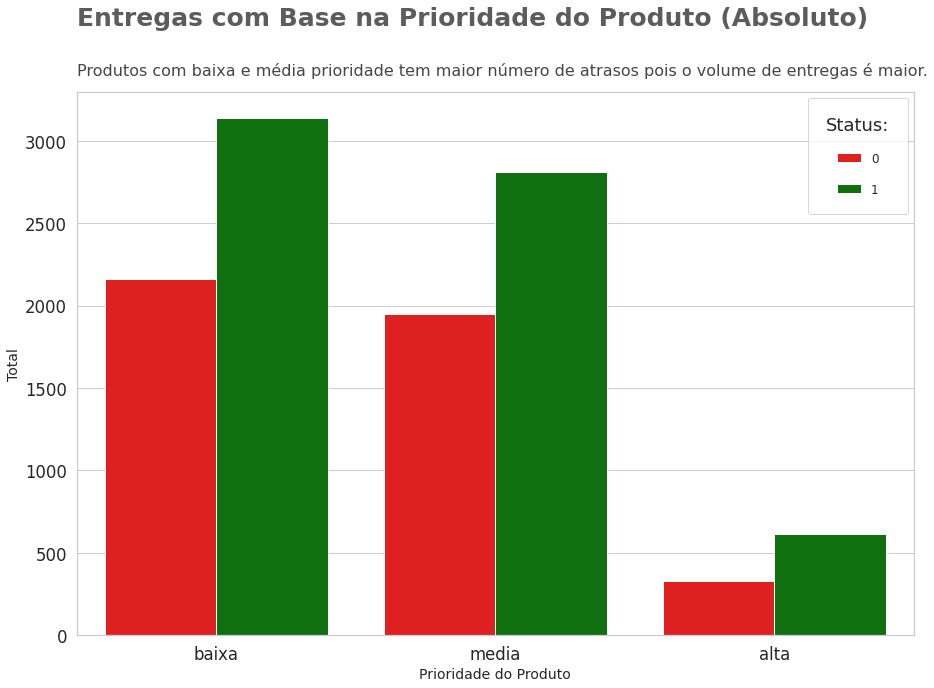

In [67]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'prioridade_produto', 
                      hue = 'entregue_no_prazo',
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Prioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.5, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 3700, 
           s = "Entregas com Base na Prioridade do Produto (Absoluto)",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 3400,
           s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior.',
           fontsize = 16, 
           alpha = .85);

### <br>Gráfico 2 - Análise em Valores Percentuais

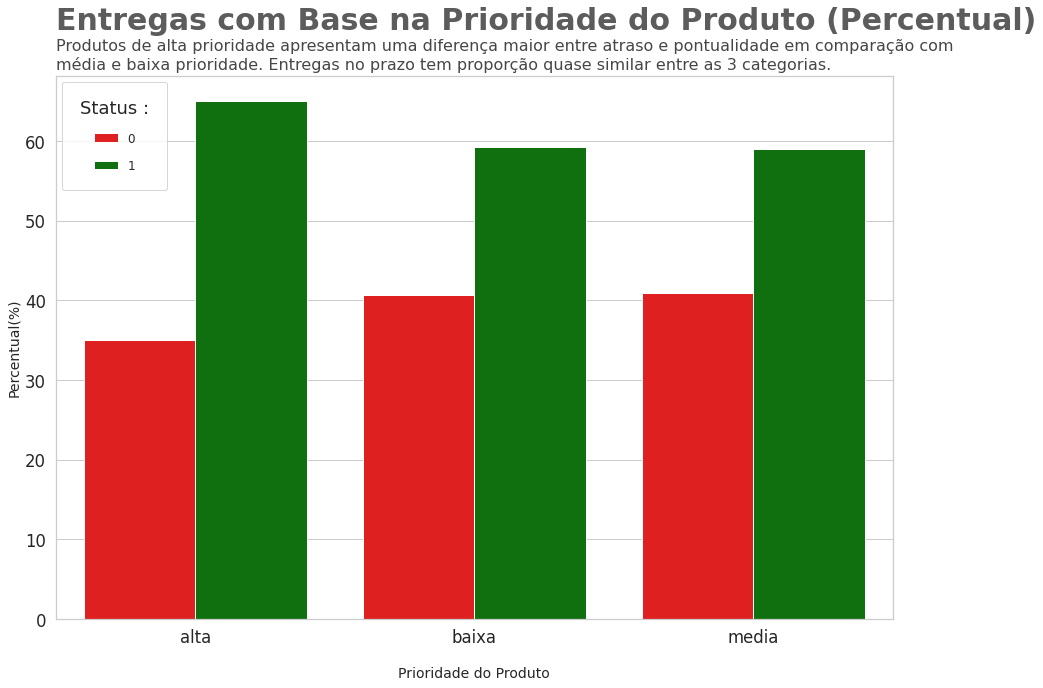

In [69]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Prioridade do Produto', 
                    y = 'Percentual(%)', 
                    data = df_group10, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status :')
chart.text(x = -0.5, 
           y = 74, 
           s = "Entregas com Base na Prioridade do Produto (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 69,
           s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
           fontsize = 16, 
           alpha = .85);

### -> Resposta:   as respostas estão nos gráficos.

## <br><br><u><font color='darkgreen'>Pergunta 3:</font></u><br>

### 3) Quais corredores armazenam produtos com maior proporção de entregas com atraso?

In [71]:
# Relembrando nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [72]:
# Verificando as classes da Coluna prioridade_produto
df['corredor_armazem'].value_counts()

corredor_armazem
F    3666
D    1834
C    1834
A    1833
B    1833
Name: count, dtype: int64

In [73]:
# Criando Tabela de Agregação 11 através de entregue_no_prazo e corredor_armazem
# Usando coluna ID para retornar a quantidade de valores únicos
df_group11 = df.groupby(['entregue_no_prazo', 'corredor_armazem']).agg({'ID' : 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [74]:
# Criando Tabela de Agregação 12 através de entregue_no_prazo
# Usando coluna ID para retornar a quantidade de valores únicos
df_group12 = df.groupby('entregue_no_prazo').agg({'ID' : 'nunique'}).reset_index() 
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [75]:
# Criando Tabela de agregação 13 (
# Concatenando Tabela de Agregação 11 e Tabela de Agregação 12 com base na coluna "entregue_no_prazo"
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [76]:
# Criando Tabela de Agregação 14 através de corredor_armazem
# Usando coluna ID para retornar a quantidade de valores únicos
df_group14 = df.groupby('corredor_armazem').agg({'ID' : 'nunique'}).reset_index() 
df_group14

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [77]:
# Criando Tabela de Agregação 15 (
# Concatenando Tabela de Agregação 11 e Tabela de Agregação 14 com base na coluna "corredor_armazem"
df_group15 = df_group11.merge(df_group14, on = 'corredor_armazem')
df_group15

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,0,B,729,1833
2,0,C,740,1834
3,0,D,738,1834
4,0,F,1472,3666
5,1,A,1075,1833
6,1,B,1104,1833
7,1,C,1094,1834
8,1,D,1096,1834
9,1,F,2194,3666


In [78]:
# Utilizando Tabela de Agregação 15 , vamos criar uma nova coluna para calcular o percentual
# (divivindo ID_x por ID_y e multiplica por 100)
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100

# Renomeando Colunas
df_group15.columns = ['Status de Entrega no Prazo', 
                      'Corredor do Armazem', 
                      'Total Por Categoria', 
                      'Total Geral', 
                      'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,0,B,729,1833,39.770867
2,0,C,740,1834,40.348964
3,0,D,738,1834,40.239913
4,0,F,1472,3666,40.152755
5,1,A,1075,1833,58.647027
6,1,B,1104,1833,60.229133
7,1,C,1094,1834,59.651036
8,1,D,1096,1834,59.760087
9,1,F,2194,3666,59.847245


### <br>Gráfico 1 - Análise em Valores Absolutos

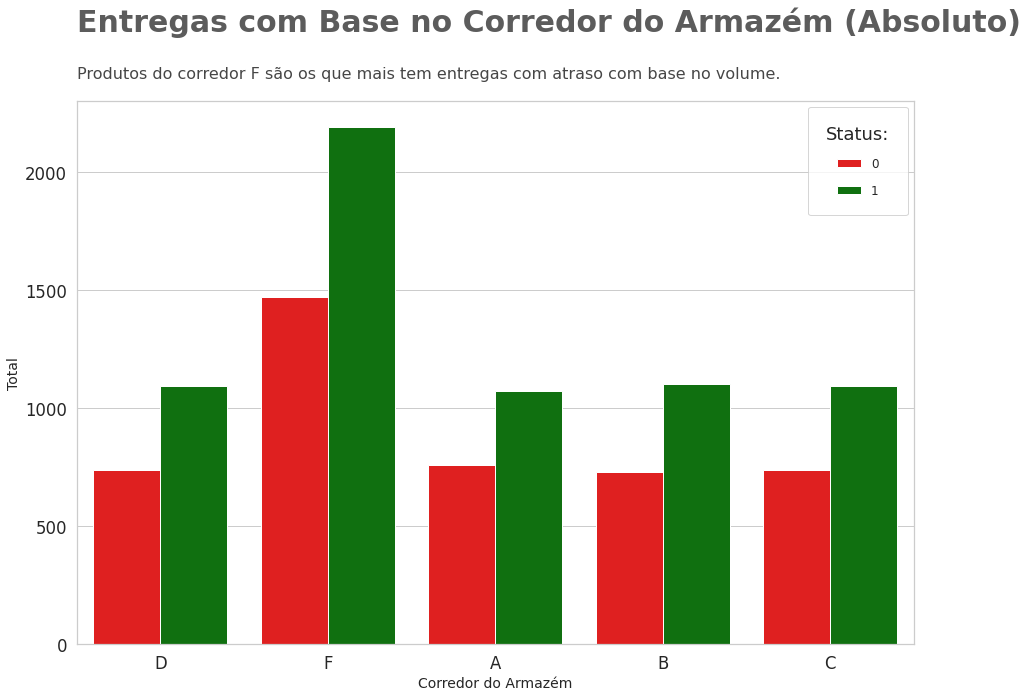

In [79]:
# Gráfico 1 - Análise em Valores Absolutos
plt.figure(figsize = (15,10))
chart = sns.countplot(data = df, 
                      x = 'corredor_armazem', 
                      hue = 'entregue_no_prazo', 
                      palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 2600, 
           s = "Entregas com Base no Corredor do Armazém (Absoluto)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 2400,
           s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
           fontsize = 16, 
           alpha = .85);

### <br>Gráfico 2 - Análise em Valores Percentuais

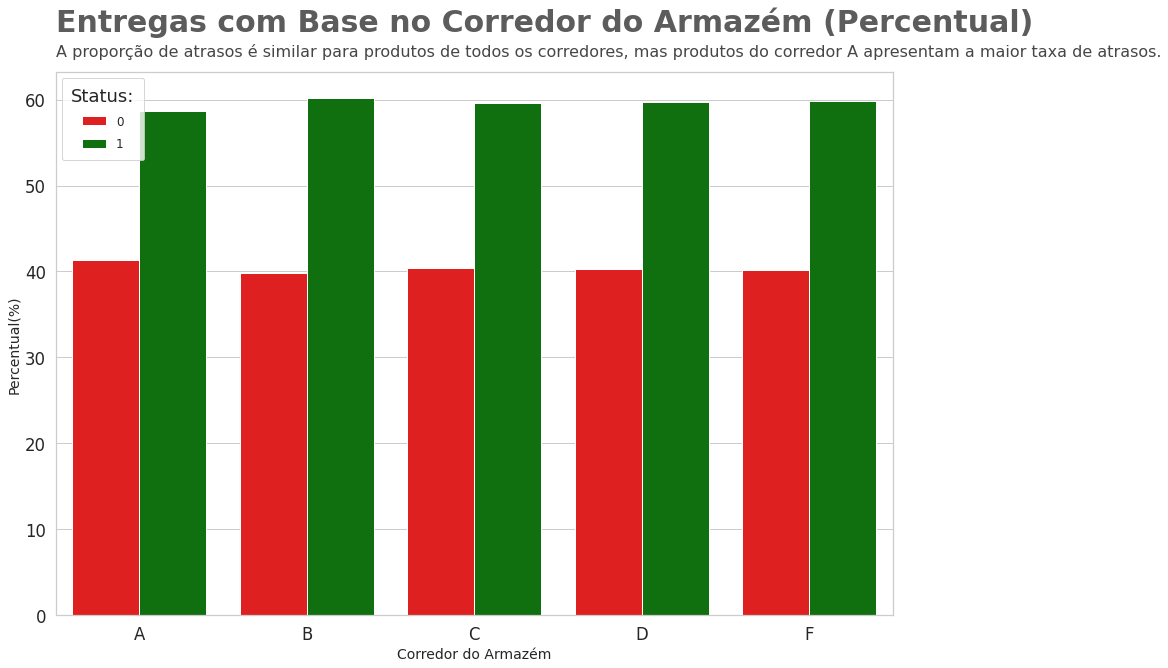

In [80]:
# Gráfico 2 - Análise em Valores Percentuais
plt.figure(figsize = (15,10))
chart = sns.barplot(x = 'Corredor do Armazem', 
                    y = 'Percentual(%)', 
                    data = df_group15, 
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("Corredor do Armazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)
plt.legend(loc = 'upper left', 
           borderpad = 0.8, 
           labelspacing = 0.8, 
           fontsize = 12, 
           title = 'Status:')
chart.text(x = -0.5, 
           y = 68, 
           s = "Entregas com Base no Corredor do Armazém (Percentual)",
           fontsize = 30, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 65,
           s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
           fontsize = 16, 
           alpha = .85);

### -> Resposta:   as respostas estão nos gráficos.

## <br><br><u><font color='darkgreen'>Desafio:</font></u><br>

### -> Como a densidade da variável que representa desconto influencia o status de entrega dos produtos?
Responda com apenas um gráfico em uma única linha de código!

In [85]:
# Relembrando nome das colunas
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

#### Resposta 1

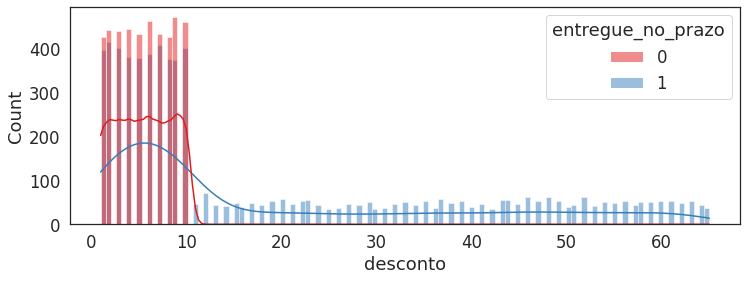

In [90]:
# Histplot
sns.histplot(data = df, x = 'desconto', kde = True, hue = 'entregue_no_prazo', palette='Set1');

#### Resposta 2

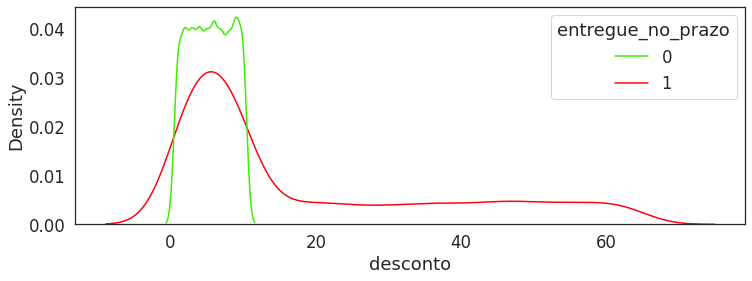

In [89]:
# Density Plot
sns.kdeplot(data = df, x = 'desconto', hue = 'entregue_no_prazo');

#### Resposta 3

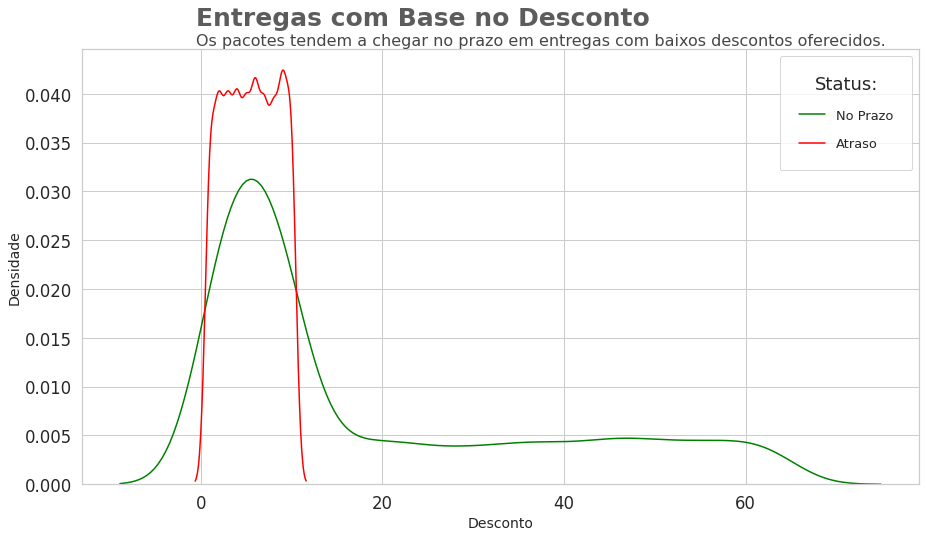

In [88]:
# Resposta com gráfico formatado (Density Plot)
plt.figure(figsize = (15,8))
chart = sns.kdeplot(data = df, 
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red","green"])
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)
plt.legend(loc = 'upper right', 
           borderpad = 1.5, 
           labelspacing = 1.2, 
           fontsize = 13, 
           title = 'Status:', 
           labels = ['No Prazo', 'Atraso'])
chart.text(x = -0.5, 
           y = 0.047, 
           s = "Entregas com Base no Desconto",
           fontsize = 25, 
           weight = 'bold', 
           alpha = .75)
chart.text(x = -0.5, 
           y = 0.045,
           s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos.',
           fontsize = 16, 
           alpha = .85);

# <br>FIM